In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns

In [2]:
!pwd

/home/user/energygpt/timesfm_cpu


In [ ]:
# datasets = ['Prayas', 'MFRED', 'NEEA', 'NEST', 'Mathura', 'Bareilly', 'SMART-star-test', 'Ireland']
datasets = ['Enernoc', 'IBlend']

In [4]:
def load_results(datasets):
    results = []
    for dataset in datasets:
        print(dataset)
        df = pd.read_csv(f'/home/user/energygpt/timesfm_cpu/results/{dataset}/results_combined.csv')
        df.insert(0, 'dataset', dataset)            
        results.append(df)            
    results_df = pd.concat(results)
    return results_df

In [5]:
res = load_results(datasets)
print(res.shape)

Enernoc
IBlend
(109, 13)


In [8]:
cols = ['sMAPE', 'nrmse']
res_agg1 = res[cols].agg( {'sMAPE': ['mean', 'std', 'median'],
                                                        'nrmse': ['mean', 'std', 'median']})
res_agg1

,sMAPE,nrmse
mean,0.240364,0.287927
std,0.347953,0.266776
median,0.082947,0.243028


In [9]:
cols = [ 'nrmse']
res_agg1 = res[cols].agg( {'nrmse': ['mean', 'std', 'median']})
res_agg1*100

,nrmse
mean,28.792676
std,26.677588
median,24.302789


In [11]:
cols = ['dataset',  'nrmse', 'nrmse_eve']

res_agg1 = res[cols].groupby(['dataset']).agg({ #'sMAPE': ['mean', 'std', 'median'],
                                                      'nrmse': ['mean', 'std', 'median'],
                                             'nrmse_eve': ['mean', 'std', 'median'] }
                                             )
res_agg1.mul(100).round(2).to_csv('./results/commercial.csv')
res_agg1.mul(100).round(2).to_latex('./results/commercial.tex')
res_agg1.mul(100).round(2)

nrmse               nrmse_eve              
          mean    std median      mean    std median
dataset                                             
Enernoc  27.01  21.31  23.44     59.28  26.80  61.19
IBlend   48.55  59.24  30.98     57.69  27.29  52.20

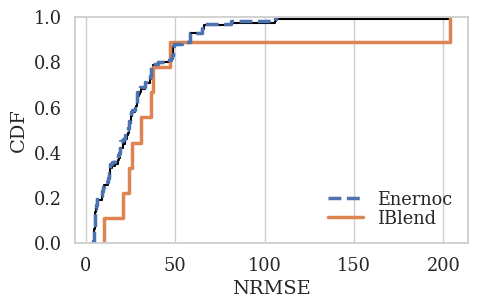

In [16]:
# sns.set(font_scale=1)  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.16)


date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()

copy_df = res['nrmse'].reset_index()
all_df = pd.DataFrame(copy_df['nrmse'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
ax_c = seaborn.ecdfplot(data=all_df.sort_values('nrmse'), x="nrmse", ax=ax, color='black', lw=1.5)
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
copy_df = res.reset_index()
copy_df['nrmse'] = copy_df['nrmse'] * 100
copy_df = copy_df.sort_values('nrmse')
# name = ['Mean', 'LCL', 'BOREALIS', 'IDEAL', 'SMART', 'SCEAUX']
ax_s = seaborn.ecdfplot(data=copy_df, x="nrmse", hue='dataset', ax=ax, lw=2.5)


for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['--', '-', 'dashdot'], ax.legend_.legend_handles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

#plt.xlim(0,80)
# ax_s.set_xscale('log')
# ax_s.set_xlim(0, 450)
# ax.legend(labels=name)
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)

plt.title(label='')
# plt.legend()
plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()

plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("Plots/TimesFM-commercial-error-cdfplot.pdf", bbox_inches='tight')
plt.show()